In [ ]:
import kagglehub

mnist_path = kagglehub.dataset_download('avnishnish/mnist-original')
film_image_path = kagglehub.dataset_download('brendan45774/film-image')
xor_dataset_path = kagglehub.dataset_download('martininf1n1ty/exclusive-xor-dataset')

print('Data source import complete.')


100%|██████████| 10.9M/10.9M [00:01<00:00, 8.63MB/s]

Extracting files...


100%|██████████| 1.67M/1.67M [00:00<00:00, 1.91MB/s]

Extracting files...


100%|██████████| 21.0k/21.0k [00:00<00:00, 15.0MB/s]

Extracting files...
Data source import complete.


## Import libraries

In [ ]:
# Install PyTorch (if needed)
# !pip install torch torchvision matplotlib

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


## Basic Tensor Operations

In [ ]:
import torch

# Create a tensor
x = torch.tensor([[1, 3,-1], [3, 4,0]])
y = torch.tensor([[5, 6,8], [7, 8,4]])
print("Tensor x:\n", x)
print("Tensor y:\n", y)

Tensor x:
 tensor([[ 1,  3, -1],
        [ 3,  4,  0]])
Tensor y:
 tensor([[5, 6, 8],
        [7, 8, 4]])


In [ ]:
# Element-wise addition
z = x + y
print("x + y:\n", z)

x + y:
 tensor([[ 6,  9,  7],
        [10, 12,  4]])


In [ ]:
# Transpose of tensor

y.T

tensor([[5, 7],
        [6, 8],
        [8, 4]])

In [ ]:
# Matrix multiplication
w = torch.matmul(x, y.T)
print("Matrix multiplication (x @ y):\n", w)


Matrix multiplication (x @ y):
 tensor([[15, 27],
        [39, 53]])


In [ ]:
# Reshape a tensor
x_reshaped = x.reshape(3,2)
print("Reshaped x:\n", x_reshaped)
x_reshaped.shape

Reshaped x:
 tensor([[ 1,  3],
        [-1,  3],
        [ 4,  0]])


torch.Size([3, 2])

In [ ]:
y_reshaped = y.reshape(-1,2)
print("Reshaped y:\n", y_reshaped)
y_reshaped.shape

Reshaped y:
 tensor([[5, 6],
        [8, 7],
        [8, 4]])


torch.Size([3, 2])

In [ ]:
y_reshaped = y.reshape(-1)
print("Reshaped y:\n", y_reshaped)
y_reshaped.shape

Reshaped y:
 tensor([5, 6, 8, 7, 8, 4])


torch.Size([6])

## Building a Simple Neural Network

### The model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found [here](https://pytorch.org/docs/stable/nn.html). In case you need a certain network layer, check the documentation of the package first before writing the layer yourself as the package likely contains the code for it already. We import it below:

#### nn.Module

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:

In [ ]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

In [ ]:
# Load the XOR dataset from CSV
df = pd.read_csv( xor_dataset_path  +"/xor.csv" ,  index_col=0)
df.head()

,X1,X2,label
0,0.295740,0.084965,0.0
1,0.071516,0.281896,0.0
2,0.167992,0.242829,0.0
3,0.007919,0.481756,0.0
4,0.100156,0.447592,0.0


                XOR Gate Truth Table


![XOR Gate Truth Table](https://cdn1.byjus.com/wp-content/uploads/2023/06/xor-gate-truth-table.png)


The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted.

#### Simple classifier
We can now make use of the pre-defined modules in the `torch.nn` package, and define our own small neural network. We will use a minimal network with a input layer, one hidden layer with tanh as activation function, and a output layer. In other words, our networks should look something like this:

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"></center>

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red.
In PyTorch, we can define this as follows:

In [ ]:
X = df[['X1', 'X2']].values  # Input features
y = df['label'].values  # Output labels

print("Shape of DataFrame (df):", df.shape)
print("Shape of Feature Matrix (X):", X.shape)
print("Shape of Target Vector (y):", y.shape)

Shape of DataFrame (df): (1000, 3)
Shape of Feature Matrix (X): (1000, 2)
Shape of Target Vector (y): (1000,)


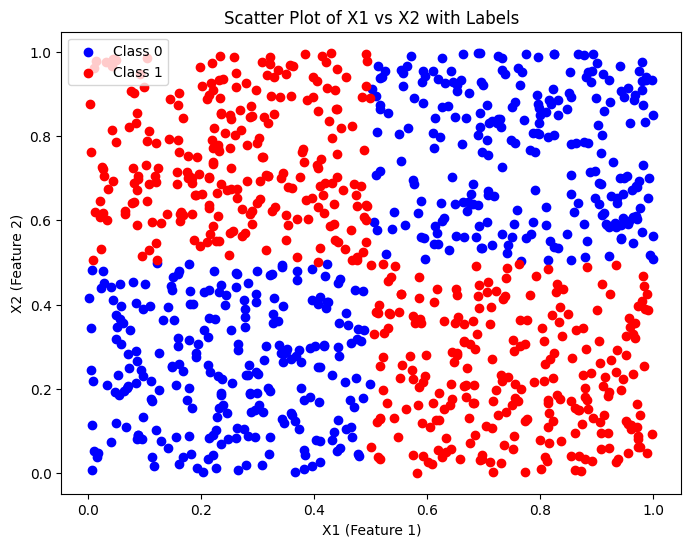

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot for points with label 0 (use different color for different labels)
plt.scatter(df['X1'][y == 0], df['X2'][y == 0], color='blue', label='Class 0')
plt.scatter(df['X1'][y == 1], df['X2'][y == 1], color='red', label='Class 1')

# Adding labels and title
plt.title("Scatter Plot of X1 vs X2 with Labels")
plt.xlabel("X1 (Feature 1)")
plt.ylabel("X2 (Feature 2)")
plt.legend()

In [ ]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

print("Shape of Feature Matrix (X):", X.shape)
print("Shape of Target Vector (y):", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape, "\tShape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape, "\tShape of y_test:", y_test.shape)

Shape of Feature Matrix (X): torch.Size([1000, 2])
Shape of Target Vector (y): torch.Size([1000, 1])
Shape of X_train: torch.Size([800, 2]) 	Shape of X_test: torch.Size([200, 2])
Shape of y_train: torch.Size([800, 1]) 	Shape of y_test: torch.Size([200, 1])


In [ ]:
# Define a simple neural network
class XORModel(nn.Module):
    def __init__(self  ,num_inputs, num_hidden, num_outputs):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hidden)  # Input layer (2 features) to hidden layer (4 neurons)
        self.fc2 = nn.Linear(num_hidden, num_outputs)  # Hidden layer to output layer (1 output)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.sigmoid(self.fc2(x))  # Apply sigmoid activation for binary output
        return x

In [ ]:
# Instantiate the model
model = XORModel(num_inputs=2, num_hidden=8, num_outputs=1)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("Model architecture:\n", model)

Model architecture:
 XORModel(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. For our small neural network, we have the following parameters:

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param}")

Parameter fc1.weight, shape Parameter containing:
tensor([[ 0.2586,  0.5410],
        [ 0.6586,  0.3116],
        [-0.5246, -0.1417],
        [ 0.5626, -0.3883],
        [ 0.0429,  0.6803],
        [-0.0381, -0.1887],
        [-0.5536, -0.1135],
        [ 0.6061,  0.5329]], requires_grad=True)
Parameter fc1.bias, shape Parameter containing:
tensor([ 0.6653, -0.3557,  0.2278,  0.5165,  0.6343, -0.0186,  0.5921, -0.6604],
       requires_grad=True)
Parameter fc2.weight, shape Parameter containing:
tensor([[-0.2212,  0.0968, -0.0473, -0.1143, -0.1672,  0.1441, -0.1398, -0.2670]],
       requires_grad=True)
Parameter fc2.bias, shape Parameter containing:
tensor([0.2799], requires_grad=True)


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters. Note that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules. We will use them in a few later tutorials and explain them there.

In [ ]:
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(X_test)
    predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
    correct = (predictions == y_test).sum().item()
    total = y_test.size(0)
    accuracy = correct / total/10
print(f"Test Accuracy: {accuracy }%")

Test Accuracy: 0.048%


In [ ]:
for epoch in range(1, 2):  # 1 epochs for demonstration
    print(f"\nEpoch {epoch}/{3}")

    print("\nModel weights before forward pass:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data}")

    ### Forward pass: Compute the model's predictions (outputs)
    outputs = model(X_train)  # Pass the inputs through the model


    ### Calculate the loss (compare predictions to actual labels)
    loss = criterion(outputs, y_train)
    print(f"Loss: {loss.item()}")

    ### Backward pass: Compute gradients
    optimizer.zero_grad()  # Clear gradients before backward pass
    loss.backward()  # Backpropagate the error and compute gradients

    # Print the model gradients after backward pass (gradients are computed here)
    print("\nGradients after backward pass (computed gradients):")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Gradients for {name}: {param.grad}")

    ### Optimizer step: Update the model's weights using the computed gradients
    optimizer.step()


    print("\nModel weights after optimizer step (weights updated):")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data}")



Epoch 1/3

Model weights before forward pass:
fc1.weight: tensor([[ 0.2586,  0.5410],
        [ 0.6586,  0.3116],
        [-0.5246, -0.1417],
        [ 0.5626, -0.3883],
        [ 0.0429,  0.6803],
        [-0.0381, -0.1887],
        [-0.5536, -0.1135],
        [ 0.6061,  0.5329]])
fc1.bias: tensor([ 0.6653, -0.3557,  0.2278,  0.5165,  0.6343, -0.0186,  0.5921, -0.6604])
fc2.weight: tensor([[-0.2212,  0.0968, -0.0473, -0.1143, -0.1672,  0.1441, -0.1398, -0.2670]])
fc2.bias: tensor([0.2799])
Loss: 0.6930558681488037

Gradients after backward pass (computed gradients):
Gradients for fc1.weight: tensor([[ 0.0062,  0.0057],
        [-0.0042, -0.0013],
        [-0.0005,  0.0010],
        [ 0.0032,  0.0030],
        [ 0.0047,  0.0043],
        [ 0.0000,  0.0000],
        [ 0.0065,  0.0060],
        [-0.0114, -0.0121]])
Gradients for fc1.bias: tensor([ 0.0114, -0.0096, -0.0015,  0.0059,  0.0086,  0.0000,  0.0100, -0.0127])
Gradients for fc2.weight: tensor([[-0.0557,  0.0028,  0.0047, -0.0324

In [ ]:
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):

    ## Step 1: Run the model on the input data
    outputs = model(X_train)


    ## Step 2: Calculate the loss
    loss = criterion(outputs, y_train)


    ## Step 3: Perform backpropagation
    # Before calculating the gradients, we need to ensure that they are all zero.
    # The gradients would not be overwritten, but actually added to the existing ones.
    optimizer.zero_grad()  # Clear gradients

    # Perform backpropagation
    loss.backward()  # Compute gradients

    ## Step 4: Update the parameters
    optimizer.step()  # Update weights

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1000/10000], Loss: 0.3760
Epoch [2000/10000], Loss: 0.3053
Epoch [3000/10000], Loss: 0.3003
Epoch [4000/10000], Loss: 0.2998
Epoch [5000/10000], Loss: 0.2997
Epoch [6000/10000], Loss: 0.2997
Epoch [7000/10000], Loss: 0.2997
Epoch [8000/10000], Loss: 0.2997
Epoch [9000/10000], Loss: 0.2997
Epoch [10000/10000], Loss: 0.2997


In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predictions = (outputs >= 0.5).float()
    correct = (predictions == y_test).sum().item()
    total = y_test.size(0)
    accuracy = correct / total

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 82.00%


#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('fc1.weight', tensor([[ 0.4248,  0.6977],
        [ 0.9229,  0.8868],
        [-1.6018, -1.5332],
        [ 0.6662, -0.2920],
        [ 0.2117,  0.8363],
        [-0.0381, -0.1887],
        [-2.2620, -2.1650],
        [ 2.8525,  2.7416]])), ('fc1.bias', tensor([ 0.9692, -0.9150,  1.5851,  0.6986,  0.9254, -0.0186,  2.2384, -2.8284])), ('fc2.weight', tensor([[ 0.9241, -1.3521, -2.6617,  0.5443,  0.8730,  0.1441, -3.7636, -4.7582]])), ('fc2.bias', tensor([1.0023]))])


To save the state dictionary, we can use `torch.save`:

In [ ]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = XORModel(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('fc1.weight', tensor([[ 0.1062,  0.3099],
        [-2.8228, -2.7631],
        [ 2.8571,  2.6871],
        [-0.1114, -0.1623]])), ('fc1.bias', tensor([-0.4033,  2.7895, -2.8366, -0.4895])), ('fc2.weight', tensor([[ 0.1956, -4.8341, -4.8200,  0.3915]])), ('fc2.bias', tensor([3.9820]))])

Loaded model
 OrderedDict([('fc1.weight', tensor([[ 0.1062,  0.3099],
        [-2.8228, -2.7631],
        [ 2.8571,  2.6871],
        [-0.1114, -0.1623]])), ('fc1.bias', tensor([-0.4033,  2.7895, -2.8366, -0.4895])), ('fc2.weight', tensor([[ 0.1956, -4.8341, -4.8200,  0.3915]])), ('fc2.bias', tensor([3.9820]))])


A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

## Convolutional Neural Networks
Convolutional Neural Networks (CNNs) are deep learning models designed for grid-like data, such as images. They are widely used in tasks like image classification and object detection.

CNNs excel at capturing spatial patterns, making them essential for computer vision tasks.







### Image
![](https://media.geeksforgeeks.org/wp-content/uploads/20230329095332/RGB-arrays-combined-to-make-image.jpg)

array([[[ 36,  46,  40],
        [ 36,  46,  40],
        [ 35,  45,  39],
        ...,
        [ 46,  64,  75],
        [ 45,  64,  72],
        [ 45,  64,  72]],

       [[ 36,  46,  40],
        [ 36,  46,  40],
        [ 35,  45,  39],
        ...,
        [ 49,  67,  78],
        [ 48,  67,  75],
        [ 48,  67,  75]],

       [[ 36,  47,  39],
        [ 35,  46,  38],
        [ 35,  45,  39],
        ...,
        [ 50,  69,  77],
        [ 50,  69,  76],
        [ 49,  68,  75]],

       ...,

       [[ 69,  79,  73],
        [ 59,  70,  62],
        [ 45,  56,  48],
        ...,
        [ 39,  47,  47],
        [ 37,  47,  47],
        [ 37,  47,  47]],

       [[ 93, 104,  96],
        [ 76,  87,  77],
        [ 54,  65,  55],
        ...,
        [ 40,  48,  48],
        [ 38,  48,  48],
        [ 38,  48,  48]],

       [[100, 111, 101],
        [ 84,  96,  84],
        [ 70,  82,  70],
        ...,
        [ 43,  51,  51],
        [ 43,  51,  51],
        [ 43,  51,  51]]], dtype=uint8)
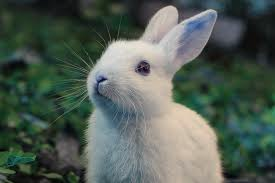

In [ ]:
img = cv2.imread( film_image_path + "/bunny.jpg")
img

In [ ]:
img.shape

(183, 275, 3)

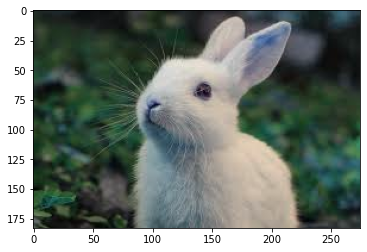

In [ ]:
plt.imshow(img)


You can explore a detailed and interactive CNN explainer by visiting the following link:

[**CNN Explainer**](https://poloclub.github.io/cnn-explainer/)

This tool helps visualize how convolutional neural networks (CNNs) work, providing a great way to understand the operations happening within each layer.


You can explore a detailed and insightful video resource on the convolution operation in deep learning by visiting the following link:

[**Convolution operation**](https://deeplizard.com/resource/pavq7noze2)

This video explains the convolution operation in convolutional neural networks (CNNs), showing how filters (kernels) are applied to input data to extract features.


You can explore an in-depth guide on convolutional neural networks (CNNs) by visiting the following link:

[**Deep Learning Wizard - About Convolutional Neural Network**](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/#about-convolutional-neural-network)

This resource provides an overview of CNNs, explaining their architecture, functionality, and how they are used for feature extraction in image data.


*   ### Convolution
    ![](https://miro.medium.com/v2/resize:fit:1358/1*D6iRfzDkz-sEzyjYoVZ73w.gif)

*   ### Padding and Stride
    ![](https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif)

*   ### Pooling
    ![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

*   ### Convolution on RGB image
    ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/12/Screenshot-from-2018-12-07-18-20-14.png)

*  ### Relation between Input and Output features during convolution
    ![](https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/05/13.png?resize=330%2C230&ssl=1)


### Exercise 1: Basic Convolution Operation

You have the following input tensor and convolution parameters:

- **Input size**: \(28 x 28 x 1\) (28x28 image with 1 channel)
- **Kernel size**: \(3 x 3\)
- **Stride**: 1
- **Padding**: 0

**Question:**
What will be the output size of the feature map after applying the convolution operation?

**Solution:**
Use the formula for calculating the output size of a convolutional layer:

$$
\text{Output Size} = \left( \frac{\text{Input Size} - \text{Kernel Size} + 2 x \text{Padding}}{\text{Stride}} \right) + 1
$$

Substituting the values:

$$
\text{Output Size} = \left( \frac{28 - 3 + 2 x 0}{1} \right) + 1 = 26
$$

**Answer:** The output size will be \(26 x 26 x 1\).

---

### Exercise 2: Convolution with Padding

You have the following input tensor and convolution parameters:

- **Input size**: \(32 x 32 x 3\) (32x32 RGB image with 3 channels)
- **Kernel size**: \(5 x 5\)
- **Stride**: 2
- **Padding**: 2

**Question:**
What will be the output size of the feature map after applying the convolution operation?

**Solution:**
Using the same formula for the output size:

$$
\text{Output Size} = \left( \frac{\text{Input Size} - \text{Kernel Size} + 2 x \text{Padding}}{\text{Stride}} \right) + 1
$$

Substituting the values:

$$
\text{Output Size} = \left( \frac{32 - 5 + 2 x 2}{2} \right) + 1 = \left( \frac{32 - 5 + 4}{2} \right) + 1 = \left( \frac{31}{2} \right) + 1 = 15 + 1 = 16
$$

**Answer:** The output size will be \(16 x 16 x 3\).

---

### Exercise 3: Convolution with Larger Stride

You have the following input tensor and convolution parameters:

- **Input size**: \(64 x 64 x 1\) (64x64 grayscale image with 1 channel)
- **Kernel size**: \(7 x 7\)
- **Stride**: 3
- **Padding**: 0

**Question:**
What will be the output size of the feature map after applying the convolution operation?

**Solution:**
Using the same formula:

$$
\text{Output Size} = \left( \frac{\text{Input Size} - \text{Kernel Size} + 2 x \text{Padding}}{\text{Stride}} \right) + 1
$$

Substituting the values:

$$
\text{Output Size} = \left( \frac{64 - 7 + 2 x 0}{3} \right) + 1 = \left( \frac{64 - 7}{3} \right) + 1 = \left( \frac{57}{3} \right) + 1 = 19 + 1 = 20
$$

**Answer:** The output size will be \(20 x 20 x 1\).

---

### Exercise 4: Max Pooling Operation

You have the following input tensor and pooling parameters:

- **Input size**: \(6 x 6 x 1\) (6x6 image with 1 channel)
- **Pool size**: \(2 x 2\)
- **Stride**: 2
- **Padding**: 0

**Question:**
What will be the output size of the feature map after applying Max Pooling?

**Solution:**
Use the formula for calculating the output size of a pooling layer:

$$
\text{Output Size} = \left( \frac{\text{Input Size} - \text{Pool Size} + 2 x \text{Padding}}{\text{Stride}} \right) + 1
$$

Substituting the values:

$$
\text{Output Size} = \left( \frac{6 - 2 + 2 x 0}{2} \right) + 1 = \left( \frac{6 - 2}{2} \right) + 1 = \left( \frac{4}{2} \right) + 1 = 2 + 1 = 3
$$

**Answer:** The output size will be \(3 x 3 x 1\).

---

### Exercise 5: Max Pooling with Padding

You have the following input tensor and pooling parameters:

- **Input size**: \(8 x 8 x 1\) (8x8 image with 1 channel)
- **Pool size**: \(3 x 3\)
- **Stride**: 2
- **Padding**: 1

**Question:**
What will be the output size of the feature map after applying Max Pooling?

**Solution:**
Using the same formula for the output size:

$$
\text{Output Size} = \left( \frac{\text{Input Size} - \text{Pool Size} + 2 x \text{Padding}}{\text{Stride}} \right) + 1
$$

Substituting the values:

$$
\text{Output Size} = \left( \frac{8 - 3 + 2 x 1}{2} \right) + 1 = \left( \frac{8 - 3 + 2}{2} \right) + 1 = \left( \frac{7}{2} \right) + 1 = 3 + 1 = 4
$$

**Answer:** The output size will be \(4 x 4 x 1\).


*   ### A Convolutional Neural Network
    ![](https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/master/C4%20-%20Convolutional%20Neural%20Networks/Notes/Images/06.png)

## Essential PyTorch Components

#### Neural Network Layers and Functions

**🔰 Convolutional Layer**
```python
# 1. Convolutional Layer (Conv2d)
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```
Applies a 2D convolution over an input signal. Essential for image processing tasks.
- `in_channels`: Number of input channels (e.g., 3 for RGB images)
- `out_channels`: Number of output channels (number of filters)
- `kernel_size`: Size of the convolving kernel
- `stride`: Stride of the convolution
- `padding`: Padding added to input

**🔰 Max Pooling Layer**
```python
# 2. Max Pooling Layer
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
```
Reduces spatial dimensions by taking maximum value in each window.
- `kernel_size`: Size of the window to take maximum over
- `stride`: Stride of the window (default: kernel_size)
- `padding`: Padding added to input

**🔰 ReLU Activation**
```python
# 3. ReLU Activation Function
torch.nn.ReLU(inplace=False)
```
Applies element-wise ReLU function: f(x) = max(0,x)
- `inplace`: If True, modifies input directly (saves memory)

**🔰 Sigmoid Activation**
```python
# 4. Sigmoid Activation Function
torch.nn.Sigmoid()
```
Applies the element-wise sigmoid function: f(x) = 1 / (1 + exp(-x))
- Commonly used for binary classification
- Maps any input to a value between 0 and 1
- Useful for output layer in binary classification or gates in LSTM

**🔰 Batch Normalization**
```python
# 5. Batch Normalization
torch.nn.BatchNorm2d(num_features)
```
Normalizes the input layer by adjusting and scaling activations.
- `num_features`: Number of features/channels expected in input

**🔰 Linear Layer**
```python
# 6. Linear Layer (Fully Connected)
torch.nn.Linear(in_features, out_features)
```
Applies linear transformation: y = xA^T + b
- `in_features`: Size of each input sample
- `out_features`: Size of each output sample

**🔰 Dropout Layer**
```python
# 7. Dropout Layer
torch.nn.Dropout(p=0.5)
```
Randomly zeroes some elements of input tensor with probability p.
- `p`: Probability of zeroing an element

**🔰 Flatten Layer**
```python
# 8. Flatten Layer
torch.nn.Flatten(start_dim=1)
```
Flattens a contiguous range of dims into a tensor.
- `start_dim`: First dim to flatten (default: 1)

#### Optimization and Training Components

**🔰 SGD Optimizer**
```python
# 9. SGD Optimizer
torch.optim.SGD(params, lr=0.01, momentum=0)
```
Implements stochastic gradient descent optimization.
- `params`: Network parameters to optimize
- `lr`: Learning rate
- `momentum`: Momentum factor

**🔰 Cross Entropy Loss**
```python
# 10. Cross Entropy Loss
torch.nn.CrossEntropyLoss()
```
Combines LogSoftmax and NLLLoss in single class.
- Useful for training classification models
- Automatically applies softmax to network output
-  The mathematical formula is: $\text{Cross Entropy} = -\sum_{i=1}^{C} y_i \log(\hat{y_i})$


where:
- $C$ is the number of classes
- $y_i$ is the true probability of class i
- $\hat{y}_i$ is the predicted probability of class i

For binary classification, it simplifies to: $ \text{Binary Cross Entropy} = -(y \log(\hat{y}) + (1-y)\log(1-\hat{y})) $


**🔰 MSE Loss (Mean Squared Error)**
```python
# 11. MSE Loss
torch.nn.MSELoss(reduction='mean')
```
Measures the mean squared error (squared L2 norm) between predicted and actual values.
- `reduction`: Specifies the reduction to apply to the output ('mean', 'sum', or 'none')
- Common for regression problems
- Also known as L2 loss
- Formula: $ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(x_i - y_i)^2 $


**🔰 DataLoader**
```python
# 12. DataLoader
torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
```
Combines a dataset and sampler to provide iteration over dataset.
- `dataset`: Dataset from which to load data
- `batch_size`: How many samples per batch
- `shuffle`: Whether to reshuffle data at every epoch

## Identifying hand-written digits(MNIST) using PyTorch

We will use the famous <b>MNIST Handwritten Digits Databases</b> as our training dataset.It consists of 28px by 28px grayscale images of handwritten disgits(0 - 9), along with labels for each image indicating which digit it represents. MNIST stands for <b>Modified National Institute of Standards and Technology.</b>

In [ ]:
from scipy.io import loadmat
mnist = loadmat(mnist_path + "/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


## Preparing MNIST Dataset

The MNIST dataset contains images of size **28x28 pixels**.

Each image is initially stored as a **1D array of 784 values** (since 28 * 28 = 784). This means the dataset is represented in the following format:

- **`(N, 784)`**, where `N` is the total number of images in the dataset.

The mnist_data contains all the images in a flat format, where each row corresponds to a single image.

The mnist_label contains the digit labels (0-9) for each image.

In [ ]:
print("mnist_data shape:", mnist_data.shape)
print("mnist_label shape:", mnist_label.shape)

mnist_data shape: (70000, 784)
mnist_label shape: (70000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(
    mnist_data, mnist_label, test_size=0.2, random_state=42)


print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (56000, 784)
Test data shape: (14000, 784)


In [ ]:
train_data[0].shape

(784,)

In [ ]:
train_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# Convert to PyTorch tensors
train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_data = torch.tensor(test_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

The values range from 0 to 1, with 0 representing black, 1 white and the values between different shades of grey.

In [ ]:
# Normalize the data (scale pixel values to [0, 1])
train_data = train_data / 255.0
test_data = test_data / 255.0




For a CNN, we need the data in the format: [Batch Size, Channels, Height, Width]


- **Batch Size**: Number of images in a batch.
- **Channels**: 1 for grayscale images, 3 for RGB images.
- **Height**: 28 (image height).
- **Width**: 28 (image width).




`.reshape(-1, 1, 28, 28)`

- `.reshape()`: Reshapes the tensor to the specified dimensions.
- `-1`: Automatically calculates the batch size (N) based on the other dimensions.
- `1`: Adds a channel dimension (since MNIST images are grayscale).
- `28, 28`: Reshapes each image to its original 28x28 size.

#### Before Reshaping
- **train_data shape**: `[56000, 784]`
  - 56,000 images.
  - Each image is a 1D array of 784 values.

#### After Reshaping
- **train_data shape**: `[56000, 1, 28, 28]`
  - 6,000 images.
  - 1 channel (grayscale).
  - Each image is 28x28 pixels.



In [ ]:
# Reshape the data to [N, 1, 28, 28] (MNIST images are 28x28 and grayscale)
train_data = train_data.reshape(-1, 1, 28, 28)
test_data = test_data.reshape(-1, 1, 28, 28)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: torch.Size([56000, 1, 28, 28])
Test data shape: torch.Size([14000, 1, 28, 28])


The image is now converted to a **28 x 28 tensor**.

- The **first dimension** is used to keep track of the color channels.  
- Since images in the **MNIST dataset are grayscale**, there is only **one channel**.

For datasets with color images, the color channels would typically be **3 (Red, Green, Blue - RGB)**.

#### Example:
- Grayscale image tensor: **[1, 28, 28]**
  - **1**: Represents the single grayscale channel.
  - **28 x 28**: Represents the image dimensions (height and width).

- RGB image tensor: **[3, 28, 28]**
  - **3**: Represents the color channels (Red, Green, Blue).
  - **28 x 28**: Represents the image dimensions (height and width).


In [ ]:
train_data[0].shape

torch.Size([1, 28, 28])

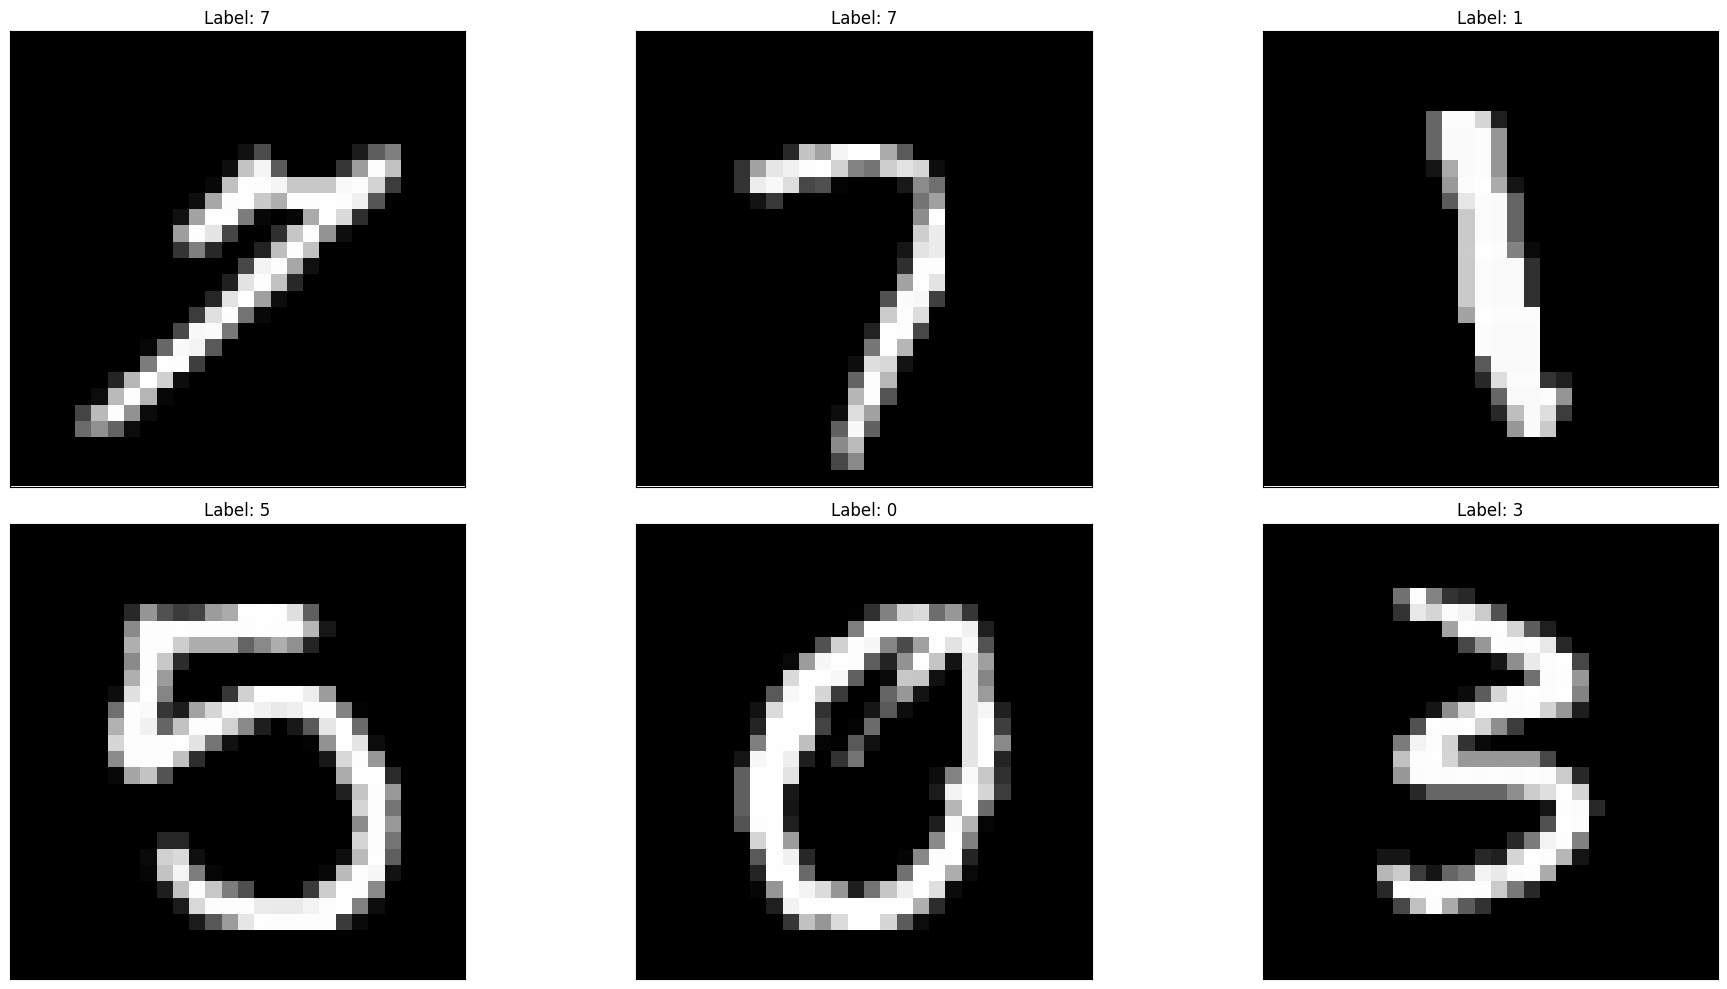

In [ ]:
plt.figure(figsize=(20, 10))

# Plot 6 images
for i in range(6):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, subplot i+1
    plt.imshow(train_data[i][0], cmap='gray', interpolation='none')  # Display grayscale image
    plt.title(f"Label: {train_labels[i].item()}")  # Show the label
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

plt.tight_layout()
plt.show()

In [ ]:
train_data.shape

torch.Size([56000, 1, 28, 28])

In [ ]:
train_data, val_data = train_data[:46000] , train_data[46000:]
train_labels, val_labels = train_labels[:46000] , train_labels[46000:]

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
val_dataset = torch.utils.data.TensorDataset(val_data, val_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Define the CNN architecture






<img src="https://raw.githubusercontent.com/floydhub/mnist/master/images/mnist_convet.png">

The formula for the output size is:

$$
\text{output_size} = \left\lfloor \frac{(\text{input_size} - \text{kernel_size} + 2 \times \text{padding})}{\text{stride}} \right\rfloor + 1
$$

Where:
- **input_size**: Size of the input (height or width).
- **kernel_size**: Size of the convolutional kernel/filter.
- **padding**: Amount of zero-padding added to the input.
- **stride**: The step size of the kernel while convolving the input.


In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2)

        # Layer 2
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(20*4*4, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Layer 1: Apply conv, ReLU, and pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        # Layer 2: Apply conv, ReLU, and pooling
        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        # Flatten before the fully connected layers
        x = x.reshape(-1, 20*4*4)

        # Fully Connected Layers with ReLU for the first one
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the model
model = ConvNet().to("cpu")
print(model)


ConvNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


## Practise making model class

In [ ]:
# TASK: Create a PyTorch model for a classification problem with the following requirements:
# - Two convolutional layers (with ReLU activations and max pooling).
# - A fully connected (dense) hidden layer.
# - An output layer for classifying into 5 categories.
# Follow the comments below to complete the task.

class PracticeModel(nn.Module):
    def __init__(self):
        super(PracticeModel, self).__init__()

        # STEP 1: Define the first convolutional layer
        # - Input channels: 1 (e.g., grayscale image)
        # - Output channels: 16
        # - Kernel size: 3
        # - Add padding=1 to keep the spatial dimensions


        # STEP 2: Define the second convolutional layer
        # - Input channels: 16 (from the previous layer)
        # - Output channels: 32
        # - Kernel size: 3
        # - Add padding=1 to keep the spatial dimensions


        # STEP 3: Define a max pooling layer
        # - Kernel size: 2
        # - Stride: 2


        # STEP 4: Define a fully connected (dense) hidden layer
        # - Input features: You need to calculate the flattened size of the feature map
        #   after the convolutional and pooling layers. Assume the input image size is 28x28.
        # - Output features: 128


        # STEP 5: Define the output layer
        # - Input features: 128 (from the hidden layer)
        # - Output features: 5 (for 5 categories)


    def forward(self, x):
        # STEP 6: Implement the forward pass
        # - Apply the first convolutional layer followed by ReLU


        # - Apply the pooling layer


        # - Apply the second convolutional layer followed by ReLU


        # - Apply the pooling layer again


        # STEP 7: Flatten the feature map before feeding it into the fully connected layer


        # - Apply the first fully connected layer followed by ReLU


        # - Apply the output layer


        return x

# STEP 8: Instantiate your model and print it
# - This will help you verify the layers and their connections
model_ = PracticeModel()
print(model_)

# HINT: Use this as a skeleton, and adjust input/output sizes as needed for other tasks!


PracticeModel()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Model Training

#### 1. **`torch.no_grad()`**

- **Purpose**: This context manager temporarily disables gradient tracking. It is used when performing inference (model evaluation) or validation, where you don’t need to update the model’s weights.
- **Why It's Used**: During evaluation or inference, you don't need gradients because the model is not being trained. **Disabling gradient tracking reduces memory usage and computation time.**

#### 2. **`optimizer.zero_grad()`**

- **Purpose**: This method clears the gradients of all model parameters. Gradients are accumulated in PyTorch by default (i.e., **gradients are not overwritten in each backward pass**).
- **Why It's Used**: Before performing the backward pass and updating the weights, it’s crucial to **zero out the previous gradients** to avoid mixing them with the current ones. This ensures that the model updates are based only on the current batch of data.

#### 3. **`model.train()`**

- **Purpose**: This method sets the model in "training mode". It tells the model that it is in the training phase and should behave accordingly.
- **Behavior**: Certain layers like **Dropout** and **BatchNorm** behave differently during training and evaluation. For example, **Dropout randomly zeros out units during training**, but not during inference.
- **Why It's Used**: Before training a model, you should call `model.train()` to ensure that all layers and components of the model are in the correct state for training.

#### 4. **`model.eval()`**

- **Purpose**: This method sets the model in "evaluation mode". It is used when you are evaluating the model on validation or test data.
- **Behavior**: Layers like **Dropout** and **BatchNorm** now behave differently (e.g., **Dropout is turned off** and **BatchNorm uses running statistics**).
- **Why It's Used**: After training, before validating or testing, call `model.eval()` to ensure the model’s layers behave correctly during inference and avoid any randomness (e.g., due to Dropout).




In [ ]:
model.eval()
with torch.no_grad():
    correct, total = 0.0, 0.0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy: {:.2f}%'.format(100 * correct / total))

Test Accuracy: 9.49%


In [ ]:
num_epochs = 5
train_losses, val_losses = [], []

for epoch in range(1, num_epochs + 1):
    train_loss, val_loss = 0.0, 0.0
    correct,total  = 0.0,0.0

    model.train() # prepare model for training
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # clear the gradients
        optimizer.zero_grad()
        # forward pass: compute predicted outputs
        output = model(inputs)
        # calculate the loss
        loss = criterion(output, labels)
        # backward pass: compute gradient
        loss.backward()
        # perform a optimization step (weight update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()

    model.eval() # validate the model
    with torch.no_grad():

        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            loss = criterion(output, labels)
            val_loss += loss.item()

            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader)
    val_loss = val_loss/len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.2f}%'.format(
            epoch, train_loss, val_loss, 100 * correct / total))


Epoch: 1 	Training Loss: 2.291123 	Validation Loss: 2.268739 	Validation Accuracy: 27.11%
Epoch: 2 	Training Loss: 2.209133 	Validation Loss: 2.082834 	Validation Accuracy: 50.66%
Epoch: 3 	Training Loss: 1.514527 	Validation Loss: 0.847230 	Validation Accuracy: 79.22%
Epoch: 4 	Training Loss: 0.584431 	Validation Loss: 0.419033 	Validation Accuracy: 88.29%
Epoch: 5 	Training Loss: 0.342840 	Validation Loss: 0.293662 	Validation Accuracy: 91.39%


In [ ]:
model.eval()  # prepare model for evaluation
with torch.no_grad():
    correct, total = 0.0, 0.0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy: {:.2f}%'.format(100 * correct / total))

Test Accuracy: 91.98%


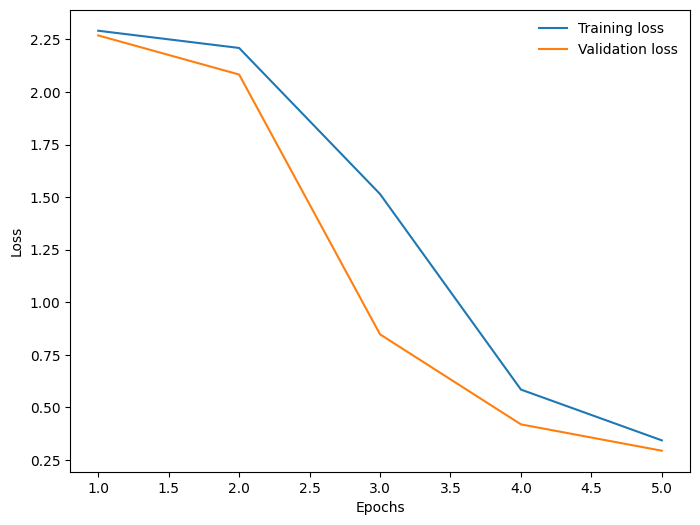

In [ ]:
x_values = list(range(1,num_epochs+1))
plt.figure(figsize=(8., 6.))
plt.plot(x_values, train_losses, label='Training loss');
plt.plot(x_values, val_losses, label='Validation loss');
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.legend(frameon=False);

In [ ]:
torch.save(model.state_dict(), 'model.pth')
torch.save(optimizer.state_dict(), 'optimizer.pth')

In [ ]:
# TASK: Implement the `train_fn` and `val_fn` functions for training and validation.
# The main loop is provided below. Complete the missing functions as per the instructions.

# TASK: Define the `train_fn` function.
# It should take the training DataLoader, model, criterion, and optimizer as inputs,
# and return the average training loss for the epoch.

def train_fn(train_loader, model, criterion, optimizer):
    #write your code here
    pass


# TASK: Define the `val_fn` function.
# It should take the validation DataLoader, model, and criterion as inputs (NO optimizer),
# and return the average validation loss for the epoch.

def val_fn(val_loader, model, criterion):
    #write your code here
    pass

EPOCHS = 25

# Main Training Loop
for ep in range(EPOCHS):

    train_fn(train_loader, model, criterion, optimizer)

    val_fn(val_loader, model, criterion)



NameError: name 'train_loader' is not defined

## Visualize some predictions

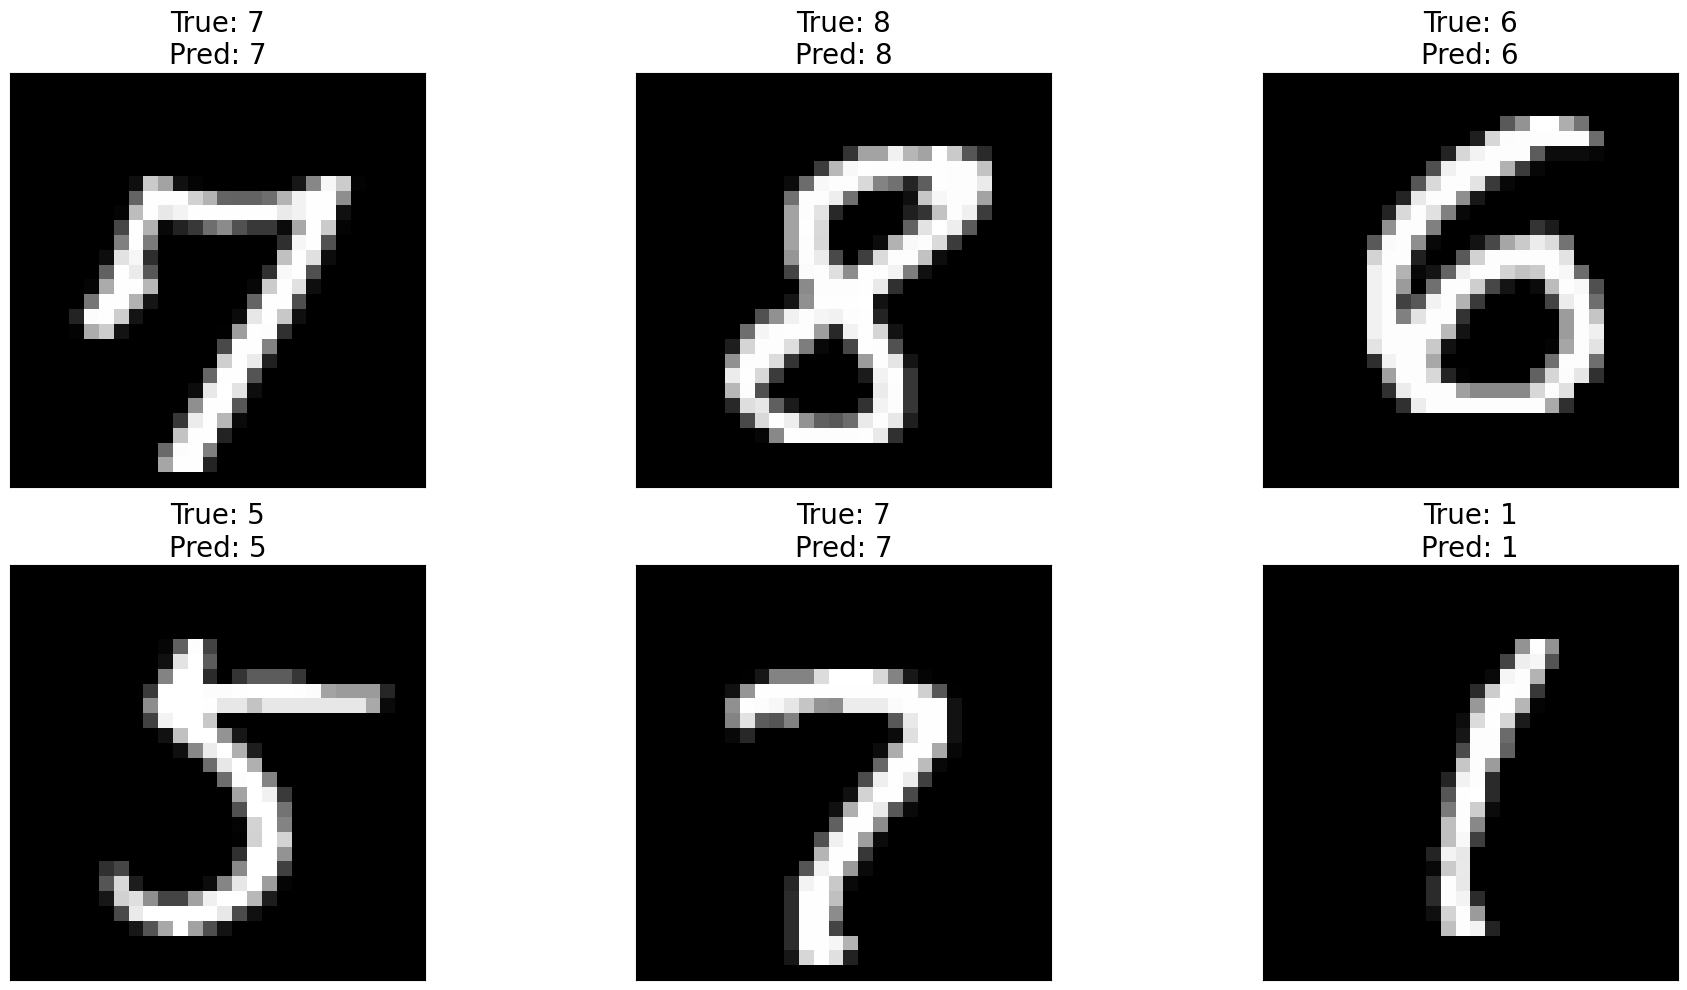

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)  # Get predicted labels

plt.figure(figsize=(20, 10))


for i in range(6):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, subplot i+1
    plt.imshow(images[i][0], cmap='gray', interpolation='none')
    plt.title(
        f"True: {labels[i].item()}\nPred: {predicted[i].item()}",
        fontsize=20,
    )
    plt.xticks([])
    plt.yticks([])


plt.tight_layout()
plt.show()